In [ ]:
# 필요한 라이브러리 생성
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
print(tf.__version__)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

2.5.0


In [ ]:
# 데이터 생성
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digit_recognizer/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digit_recognizer/test.csv')

print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train['label']
X_train = train.iloc[:, 1:]
X_test = test

X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train)
y_train.shape

(42000, 10)

In [ ]:
# 데이터를 훈련세트와 검증세트로 나눈다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10)

X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((37800, 28, 28, 1),
 (4200, 28, 28, 1),
 (37800, 10),
 (4200, 10),
 (28000, 28, 28, 1))

In [ ]:
# 데이터를 0과 1 사이의 수로 바꾼다.
X_train = X_train / 255.0
X_val = X_val / 255.0

In [ ]:
# CNN 모델 생성
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [ ]:
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 훈련 세트를 기준으로 무작위 데이터 생성
imgdatagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1,
                                width_shift_range=0.1, height_shift_range=0.1)
imgdatagen.fit(X_train)

In [ ]:
epochs= 30
LRS = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
fit_model = model.fit(imgdatagen.flow(X_train, y_train, batch_size=64), epochs=epochs,
                      steps_per_epoch = X_train.shape[0] // 64, validation_data=(X_val, y_val), callbacks=[LRS])

# fit_model = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, callbacks=[LRS])

Epoch 1/30
590/590 [==============================] - 230s 388ms/step - loss: 0.3916 - accuracy: 0.8733 - val_loss: 0.0726 - val_accuracy: 0.9748
Epoch 2/30
590/590 [==============================] - 230s 390ms/step - loss: 0.1302 - accuracy: 0.9614 - val_loss: 0.0569 - val_accuracy: 0.9831
Epoch 3/30
590/590 [==============================] - 229s 389ms/step - loss: 0.0944 - accuracy: 0.9727 - val_loss: 0.0345 - val_accuracy: 0.9883
Epoch 4/30
590/590 [==============================] - 231s 392ms/step - loss: 0.0780 - accuracy: 0.9767 - val_loss: 0.0285 - val_accuracy: 0.9914
Epoch 5/30
590/590 [==============================] - 230s 391ms/step - loss: 0.0694 - accuracy: 0.9796 - val_loss: 0.0234 - val_accuracy: 0.9921
Epoch 6/30
590/590 [==============================] - 229s 388ms/step - loss: 0.0612 - accuracy: 0.9816 - val_loss: 0.0272 - val_accuracy: 0.9907
Epoch 7/30
590/590 [==============================] - 229s 388ms/step - loss: 0.0554 - accuracy: 0.9837 - val_loss: 0.0215 -

In [ ]:
loss = fit_model.history['loss']
acc = fit_model.history['accuracy']
val_loss = fit_model.history['val_loss']
val_acc = fit_model.history['val_accuracy']
pd.DataFrame(fit_model.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,0.391628,0.873331,0.072625,0.974762,0.001000
1,0.130230,0.961443,0.056932,0.983095,0.000950
2,0.094380,0.972705,0.034529,0.988333,0.000903
3,0.077982,0.976654,0.028464,0.991429,0.000857
4,0.069362,0.979622,0.023398,0.992143,0.000815
5,0.061213,0.981636,0.027247,0.990714,0.000774
6,0.055449,0.983729,0.021455,0.993333,0.000735
7,0.051899,0.984471,0.021961,0.992857,0.000698
8,0.046579,0.986459,0.022153,0.993333,0.000663
9,0.045648,0.986220,0.021409,0.993095,0.000630


In [ ]:
print('CNN의 훈련세트의 정확도(손실): {}({})'.format(round(acc[-1], 4), round(loss[-1], 4)))
print('CNN의 검증세트의 정확도(손실): {}({})'.format(round(val_acc[-1], 4), round(val_loss[-1], 4)))

CNN의 훈련세트의 정확도(손실): 0.9941(0.02)
CNN의 검증세트의 정확도(손실): 0.9967(0.0144)


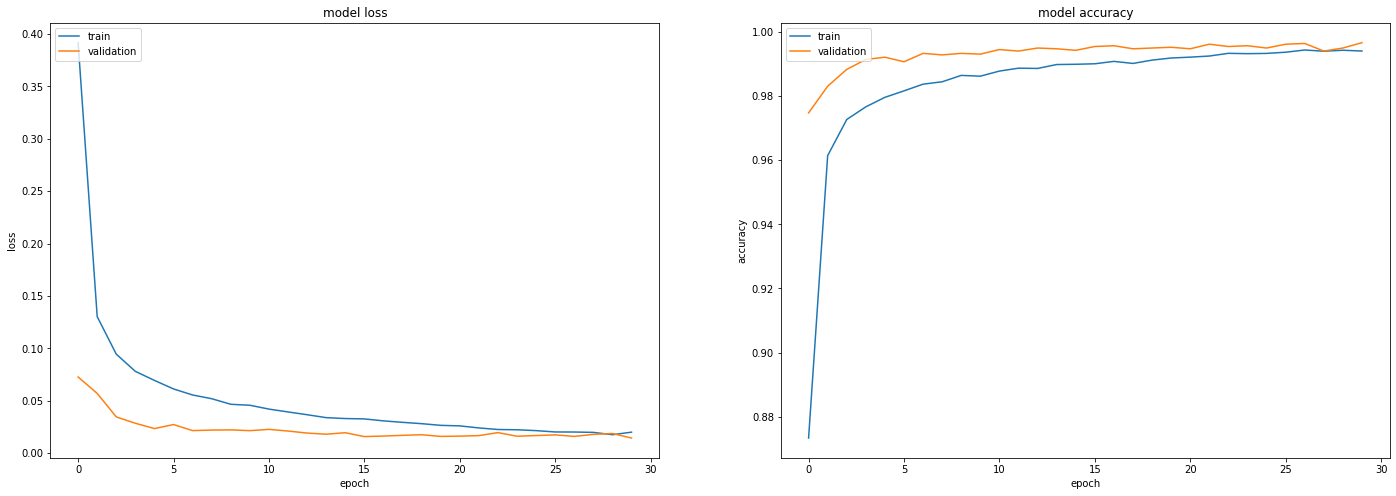

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(24,8))

axs[0].plot(fit_model.history['loss'])
axs[0].plot(fit_model.history['val_loss'])
axs[0].set_title('model loss')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[1].plot(fit_model.history['accuracy'])
axs[1].plot(fit_model.history['val_accuracy'])
axs[1].set_title('model accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')

In [ ]:
# 캐글에 제출할 파일 생성
y_test = model.predict(X_test)
submission = pd.DataFrame({'ImageId': range(1, y_test.shape[0]+1) ,'Label': np.argmax(y_test, axis=1)})
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/digit_recognizer/submission.csv', index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


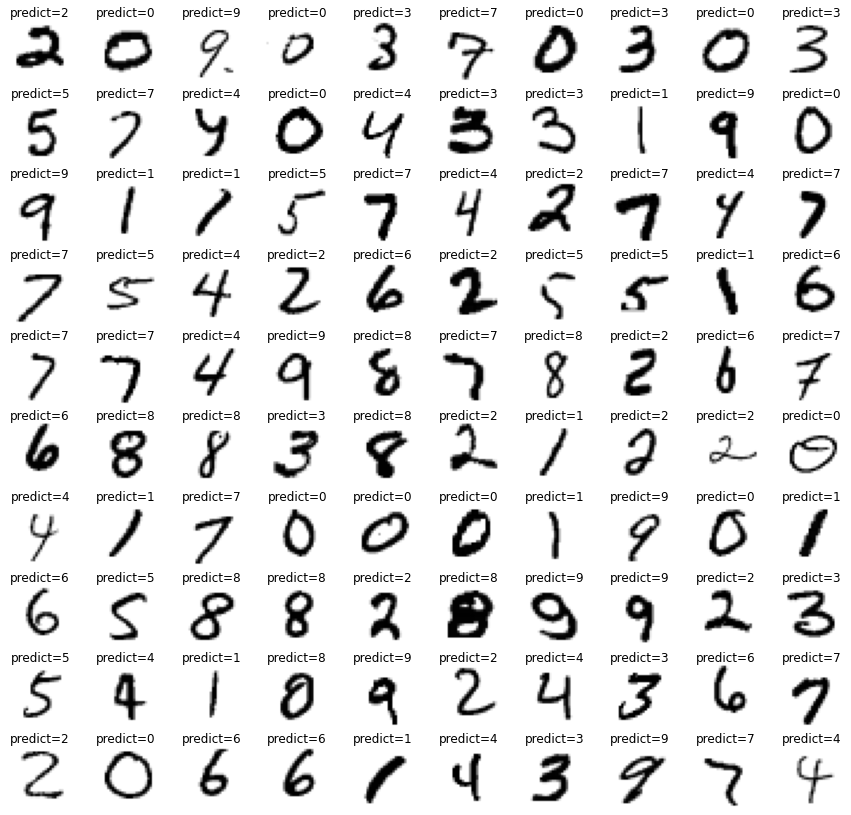

In [ ]:
# 테스트 세트에서 100개의 예제를 확인
plt.figure(figsize=(15,15))
for i in range(100):  
    plt.subplot(10, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predict=%d" % submission.iloc[i, 1], y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)

In [ ]:
# Confusion Matrix
print(confusion_matrix(np.argmax(y_train, axis=1), np.argmax(model.predict(X_train), axis=1)))
print(confusion_matrix(np.argmax(y_val, axis=1), np.argmax(model.predict(X_val), axis=1)))

[[3717    0    0    0    0    0    0    0    0    0]
 [   1 4208    0    0    1    0    1    5    0    0]
 [   0    0 3744    0    0    0    0    0    1    0]
 [   0    0    0 3904    0    1    0    0    1    2]
 [   0    0    0    0 3668    0    0    1    0    7]
 [   0    0    0    0    0 3396    6    0    1    0]
 [   0    0    0    0    0    0 3761    0    0    0]
 [   0    5    4    0    0    0    0 3954    0    0]
 [   0    0    0    0    0    0    1    0 3637    2]
 [   0    0    0    0    4    0    0    2    1 3764]]
[[413   0   0   0   0   0   1   0   1   0]
 [  0 467   0   0   0   0   0   0   1   0]
 [  0   0 432   0   0   0   0   0   0   0]
 [  0   0   0 440   0   2   0   0   1   0]
 [  0   1   0   0 394   0   0   0   0   1]
 [  0   0   0   1   0 391   0   0   0   0]
 [  0   0   0   0   1   1 374   0   0   0]
 [  0   0   0   0   1   0   0 437   0   0]
 [  0   0   0   0   0   1   0   0 421   1]
 [  0   0   0   0   0   0   0   0   0 417]]


In [ ]:
# Classification Report
print(classification_report(np.argmax(y_train, axis=1), np.argmax(model.predict(X_train), axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3717
           1       1.00      1.00      1.00      4216
           2       1.00      1.00      1.00      3745
           3       1.00      1.00      1.00      3908
           4       1.00      1.00      1.00      3676
           5       1.00      1.00      1.00      3403
           6       1.00      1.00      1.00      3761
           7       1.00      1.00      1.00      3963
           8       1.00      1.00      1.00      3640
           9       1.00      1.00      1.00      3771

    accuracy                           1.00     37800
   macro avg       1.00      1.00      1.00     37800
weighted avg       1.00      1.00      1.00     37800

